In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import numpy as np
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
X = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,male,1,0,7.2500,S
1,1,38.0,female,1,0,71.2833,C
2,3,26.0,female,0,0,7.9250,S
3,1,35.0,female,1,0,53.1000,S
4,3,35.0,male,0,0,8.0500,S


In [4]:
y = data[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [6]:
X['Age'].fillna(X['Age'].median(skipna=True), inplace=True)
X['Embarked'].fillna(X['Embarked'].value_counts().idxmax(), inplace=True)

In [7]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'Embarked'])
X = encoder.fit_transform(X)
X

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,1,1,0,7.2500,1
1,1,38.0,2,1,0,71.2833,2
2,3,26.0,2,0,0,7.9250,1
3,1,35.0,2,1,0,53.1000,1
4,3,35.0,1,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,27.0,1,0,0,13.0000,1
887,1,19.0,2,0,0,30.0000,1
888,3,28.0,2,1,2,23.4500,1
889,1,26.0,1,0,0,30.0000,2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [9]:
X_train.shape, y_test.shape

((712, 7), (179, 1))

In [22]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.01, 0.001],
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__min_samples_split': [2, 4, 6]
}
adaboost1 =  AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
grid_search = GridSearchCV(adaboost1, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f"best parameters: {best_params}")
print(f"best score: {best_score}")

best parameters: {'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 50}
best score: 0.8327073552425664


In [23]:
best_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01)

In [24]:
accuracy_score(y_test, best_model.predict(X_test))

0.7653631284916201

In [25]:
f1_score(y_test, best_model.predict(X_test))

0.6865671641791045

In [26]:
print(confusion_matrix(y_test, best_model.predict(X_test)))

[[91 17]
 [25 46]]


In [27]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       108
           1       0.73      0.65      0.69        71

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



In [26]:
train_acc=[]
test_acc=[]
for k in range(50,200,10):
    model = AdaBoostClassifier(n_estimators=k, learning_rate=1)
    model.fit(X_train, np.array(y_train).ravel())
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

In [27]:
train_acc=np.array(train_acc)
test_acc=np.array(test_acc)

In [28]:
t=np.arange(50, 200, 10)

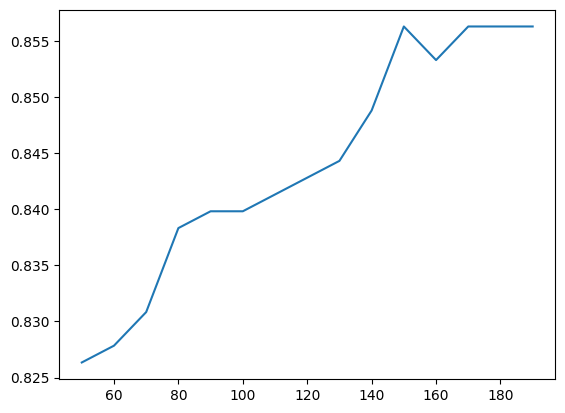

In [29]:
plt.plot(t, train_acc)

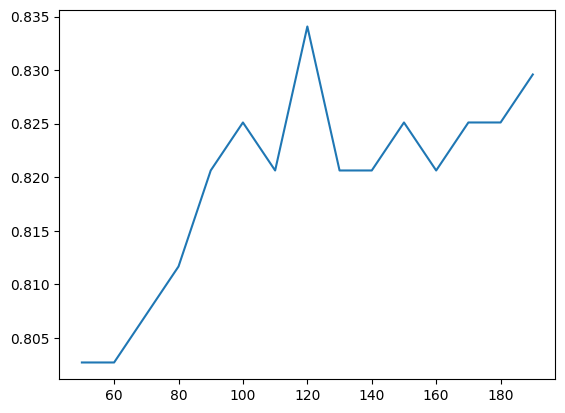

In [30]:
plt.plot(t, test_acc)